Roll.No:CS21B2026

Name:P.Veera Abhiram

In [24]:
#import libraries
import cv2 as cv
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
#Input: Image f , output: a sharpened image of 
#Sharpening a Lena Image using Prewitt Filter
#edge detection using prewitt filter
#convolution of image with prewitt filter in x and y direction
#image sharpening
#experiment with different threshold values to get the best result


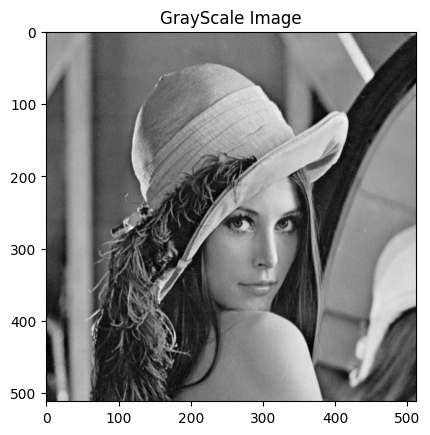

In [26]:
#read image
img = cv.imread('Lena.png')
#convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title('GrayScale Image')
plt.show()


In [27]:
#Prewitt Filter
#horizontal edge detection
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
#vertical edge detection
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

#function for no padding convolution
def convolution(img, filter):
    #get the dimensions of the image and filter
    img_h, img_w = img.shape
    filter_h, filter_w = filter.shape
    #initialize the output image
    output = np.zeros((img_h, img_w))
    #iterate over the image
    for i in range(img_h - filter_h + 1):
        for j in range(img_w - filter_w + 1):
            #get the region of the image
            region = img[i:i+filter_h, j:j+filter_w]
            #perform the convolution
            output[i, j] = np.sum(region * filter)
    final_image = np.clip(output, 0, 255)
    return final_image.astype(np.uint8)

In [28]:
#edge detection
#threshold value
threshold = 30
def edge_detection(img):
    fx = convolution(img, prewitt_x)
    fy = convolution(img, prewitt_y)
    #image and filter size
    img_h, img_w = img.shape[0], img.shape[1]
    filter_h, filter_w = prewitt_x.shape[0], prewitt_x.shape[1]

    edge_image = np.zeros((img_h, img_w))
    for i in range(0, int(edge_image.shape[0])):
        for j in range(0, int(edge_image.shape[1])):
            
            if i>=filter_h//2 and i<img_h-filter_h//2-1 and j>=filter_w//2 and j<img_w-filter_w//2-1:
                magnitude = np.sqrt(fx[i,j]**2 + fy[i,j]**2)
                if magnitude > threshold:
                    edge_image[i,j] = 1

    return edge_image.astype(np.uint8)


In [29]:
#sharpening the image
def sharpen_image(img, edge_image,const):
    return img + const * edge_image
    

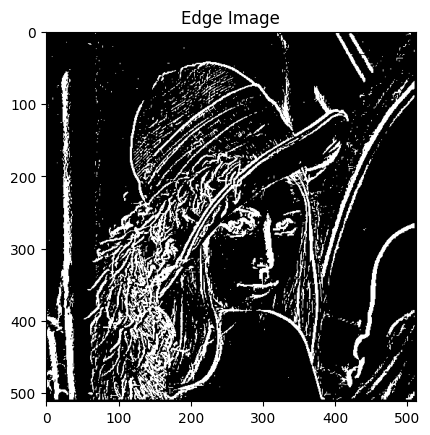

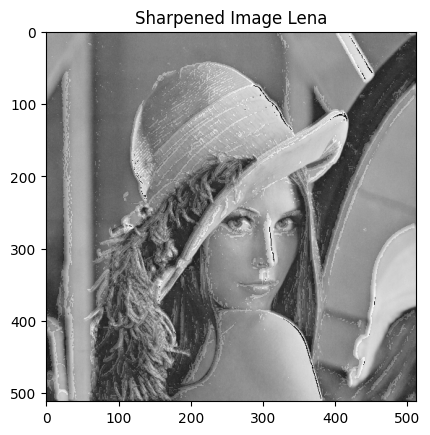

In [30]:
#applications on image
edge_img = edge_detection(gray)
plt.imshow(edge_img, cmap='gray')
plt.title('Edge Image')
plt.show()

#sharpening the image
#taking constant value as 50
sharpened_img = sharpen_image(gray, edge_img, 50)
plt.imshow(sharpened_img, cmap='gray')
plt.title('Sharpened Image Lena')
plt.show()